## Round 1

### Import the required libraries and modules that you would need.

In [24]:
import pandas as pd
import numpy as np

# for VIZUALIZATION

import seaborn as sns
from matplotlib import pyplot as plt

#for MODEL CREATION
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

#for MODEL ACCURACY CHECK
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

# for LOGISTICS REGRESSION
from sklearn.linear_model import LogisticRegression

# for KNN MODEL
from sklearn.neighbors import KNeighborsClassifier

### Read that data into Python and call the dataframe churnData.

In [25]:
df=pd.read_csv('./data_customer_churn.csv')

In [26]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [27]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [28]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce' )

### Check for null values in the dataframe. Replace the null values.

In [29]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [30]:
df.loc[df['TotalCharges'].isna() & df["tenure"]>1, "TotalCharges"] = df["MonthlyCharges"]*df["tenure"]
df.loc[df['TotalCharges'].isna() & df["tenure"]<=1, "TotalCharges"] = df["MonthlyCharges"]

### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

###     * Split the data into a training set and a test set.

In [31]:
#splitting into X and y
X=df[["tenure", "SeniorCitizen", "MonthlyCharges","TotalCharges"]]
y=df[["Churn"]]

In [9]:
#train and test split
X_train, X_test,y_train, y_test=train_test_split(X,y, random_state=42)

###   * Scale the features either by using normalizer or a standard scaler.

In [10]:
#scaling
pt=PowerTransformer()
pt.fit(X_train)
X_train_pt=pt.transform(X_train)
X_test_pt=pt.transform(X_test)

In [11]:
#mapping to get 0/1 in y_train and y_test for model
mapping = {'No': 0, 'Yes': 1}
y_train=y_train["Churn"].map(mapping)
y_test=y_test["Churn"].map(mapping)

###      * (optional)Fit a logistic Regression model on the training data

In [96]:
#fitting LOGISTICS REGRESSION

log_model = LogisticRegression() # weights to be added if we want to avoid fall negative or fall positive
log_model.fit(X_train, y_train)

# predicting data
y_pred_train = log_model.predict(X_train)
y_pred_test = log_model.predict(X_test)


#results
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_log)

#from all positive predictions we will be 64% correct (a lot of FP)
#from all really positive values, we will get it correctly only in 44% of cases (a lot of FN)

,Error_metric,Train,Test
0,Accuracy,0.788716,0.798410
1,Precision,0.643006,0.697452
2,Recall,0.443165,0.457203


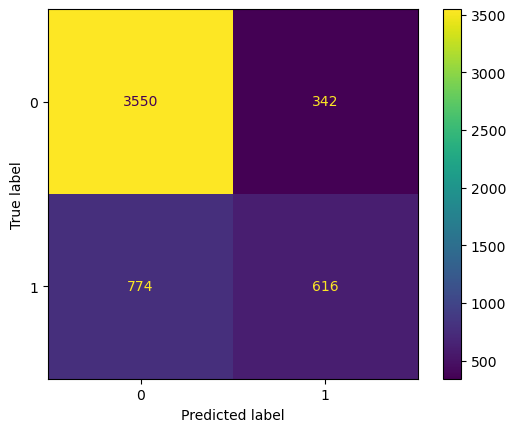

In [97]:
cm_train = confusion_matrix(y_train, y_pred_train, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()


###     * Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [98]:
#KNN Classifier

model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train_pt, y_train) # train model

X_test_pt=pd.DataFrame(X_test_pt)
X_train_pt=pd.DataFrame(X_train_pt)

y_pred = model.predict(X_test_pt.values) # predict
y_pred_train=model.predict(X_train_pt.values) # predict train

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

#from all positive predictions we will be 61% correct (a lot of FP)
#from all really positive values, we will get it correctly only in 49% of cases (a lot of FN)

,Error_metric,Train,Test
0,Accuracy,0.835858,0.776831
1,Precision,0.730803,0.611399
2,Recall,0.595683,0.492693


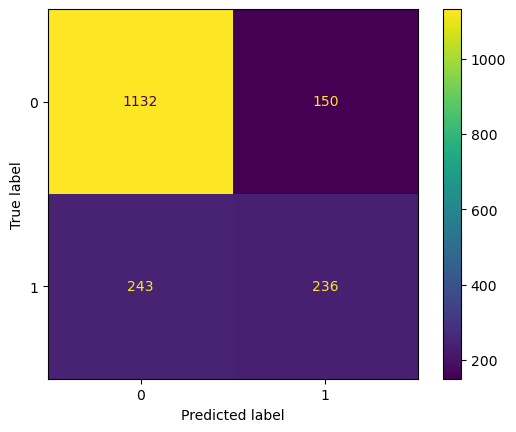

In [99]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Round 2

### Fit a Decision Tree Classifier on the training data.
### Check the error metric on the test data.

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#train and test split
X_train, X_test,y_train, y_test=train_test_split(X,y, random_state=42)
#mapping to get 0/1 in y_train and y_test for model
mapping = {'No': 0, 'Yes': 1}
y_train=y_train["Churn"].map(mapping)
y_test=y_test["Churn"].map(mapping)

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.786255,0.778535
1,Precision,0.671035,0.667925
2,Recall,0.368345,0.369520


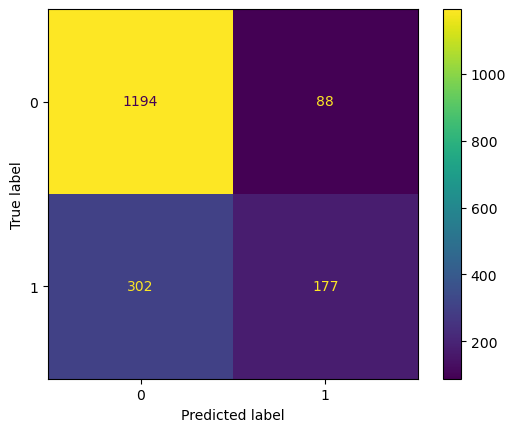

In [38]:
cm = confusion_matrix(y_test, y_pred_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

<BarContainer object of 4 artists>

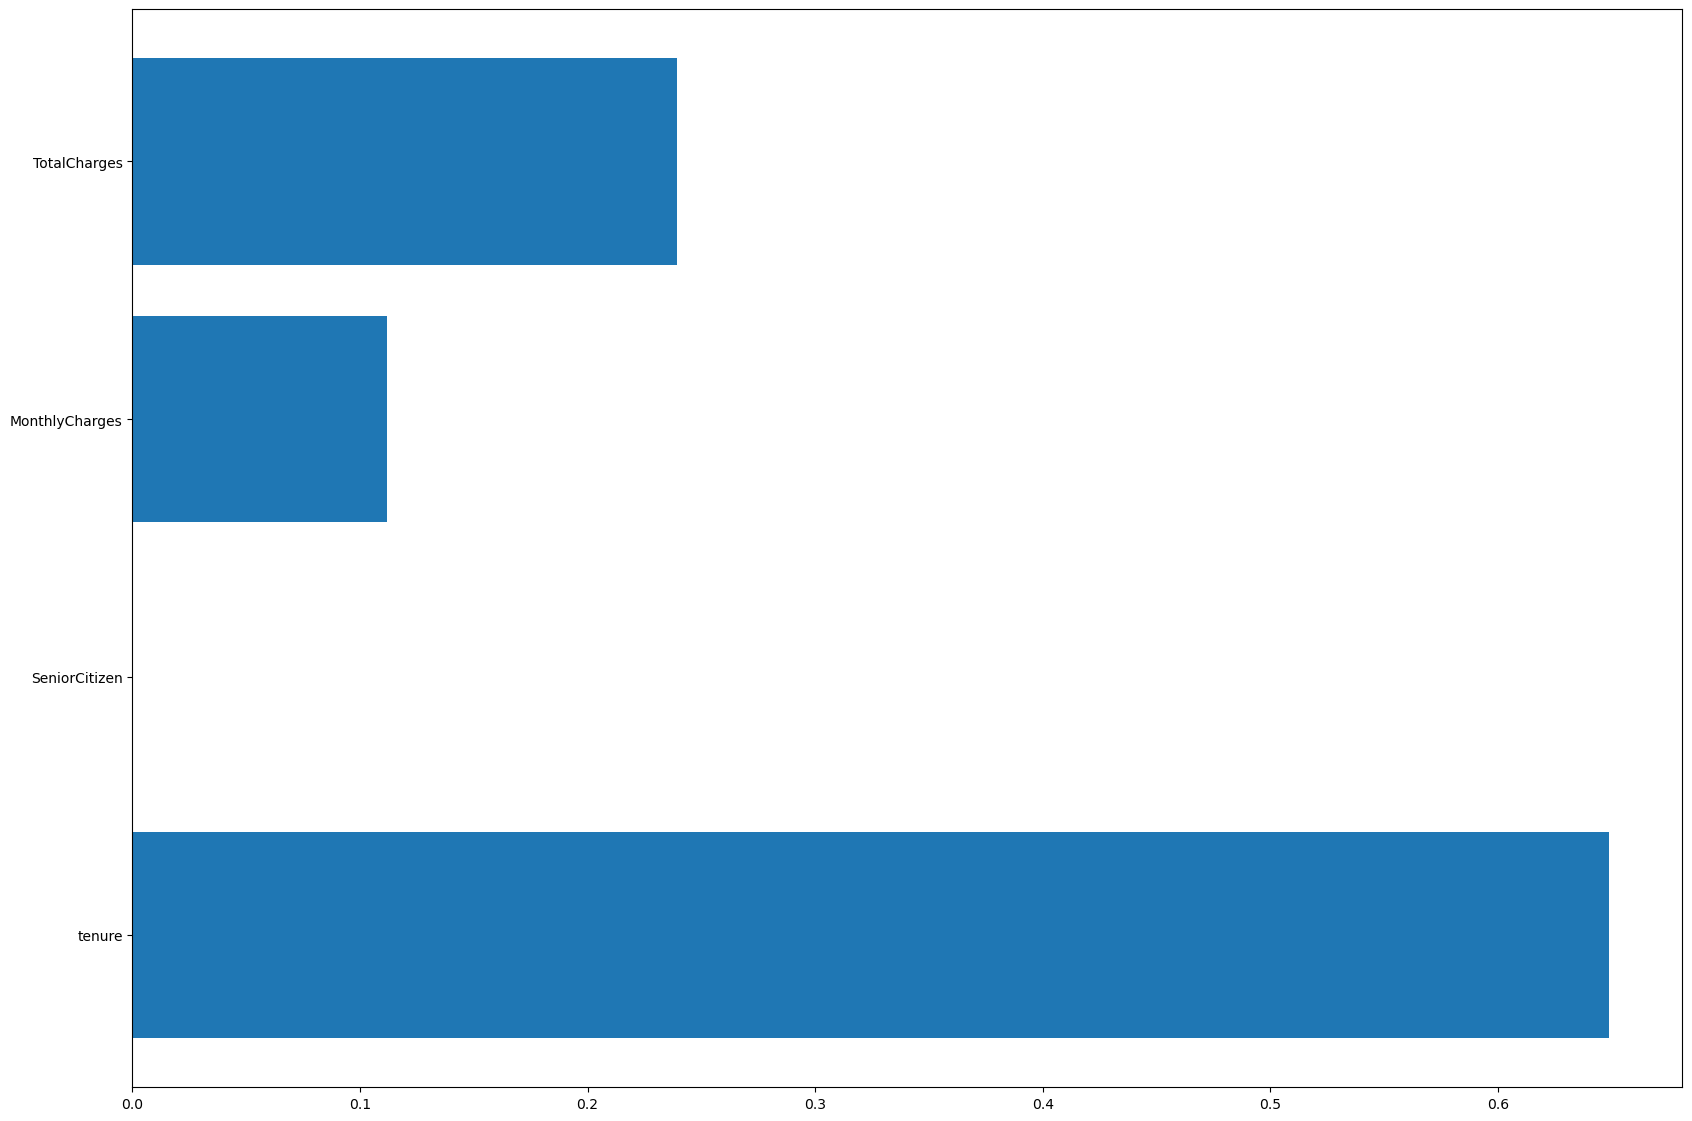

In [39]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

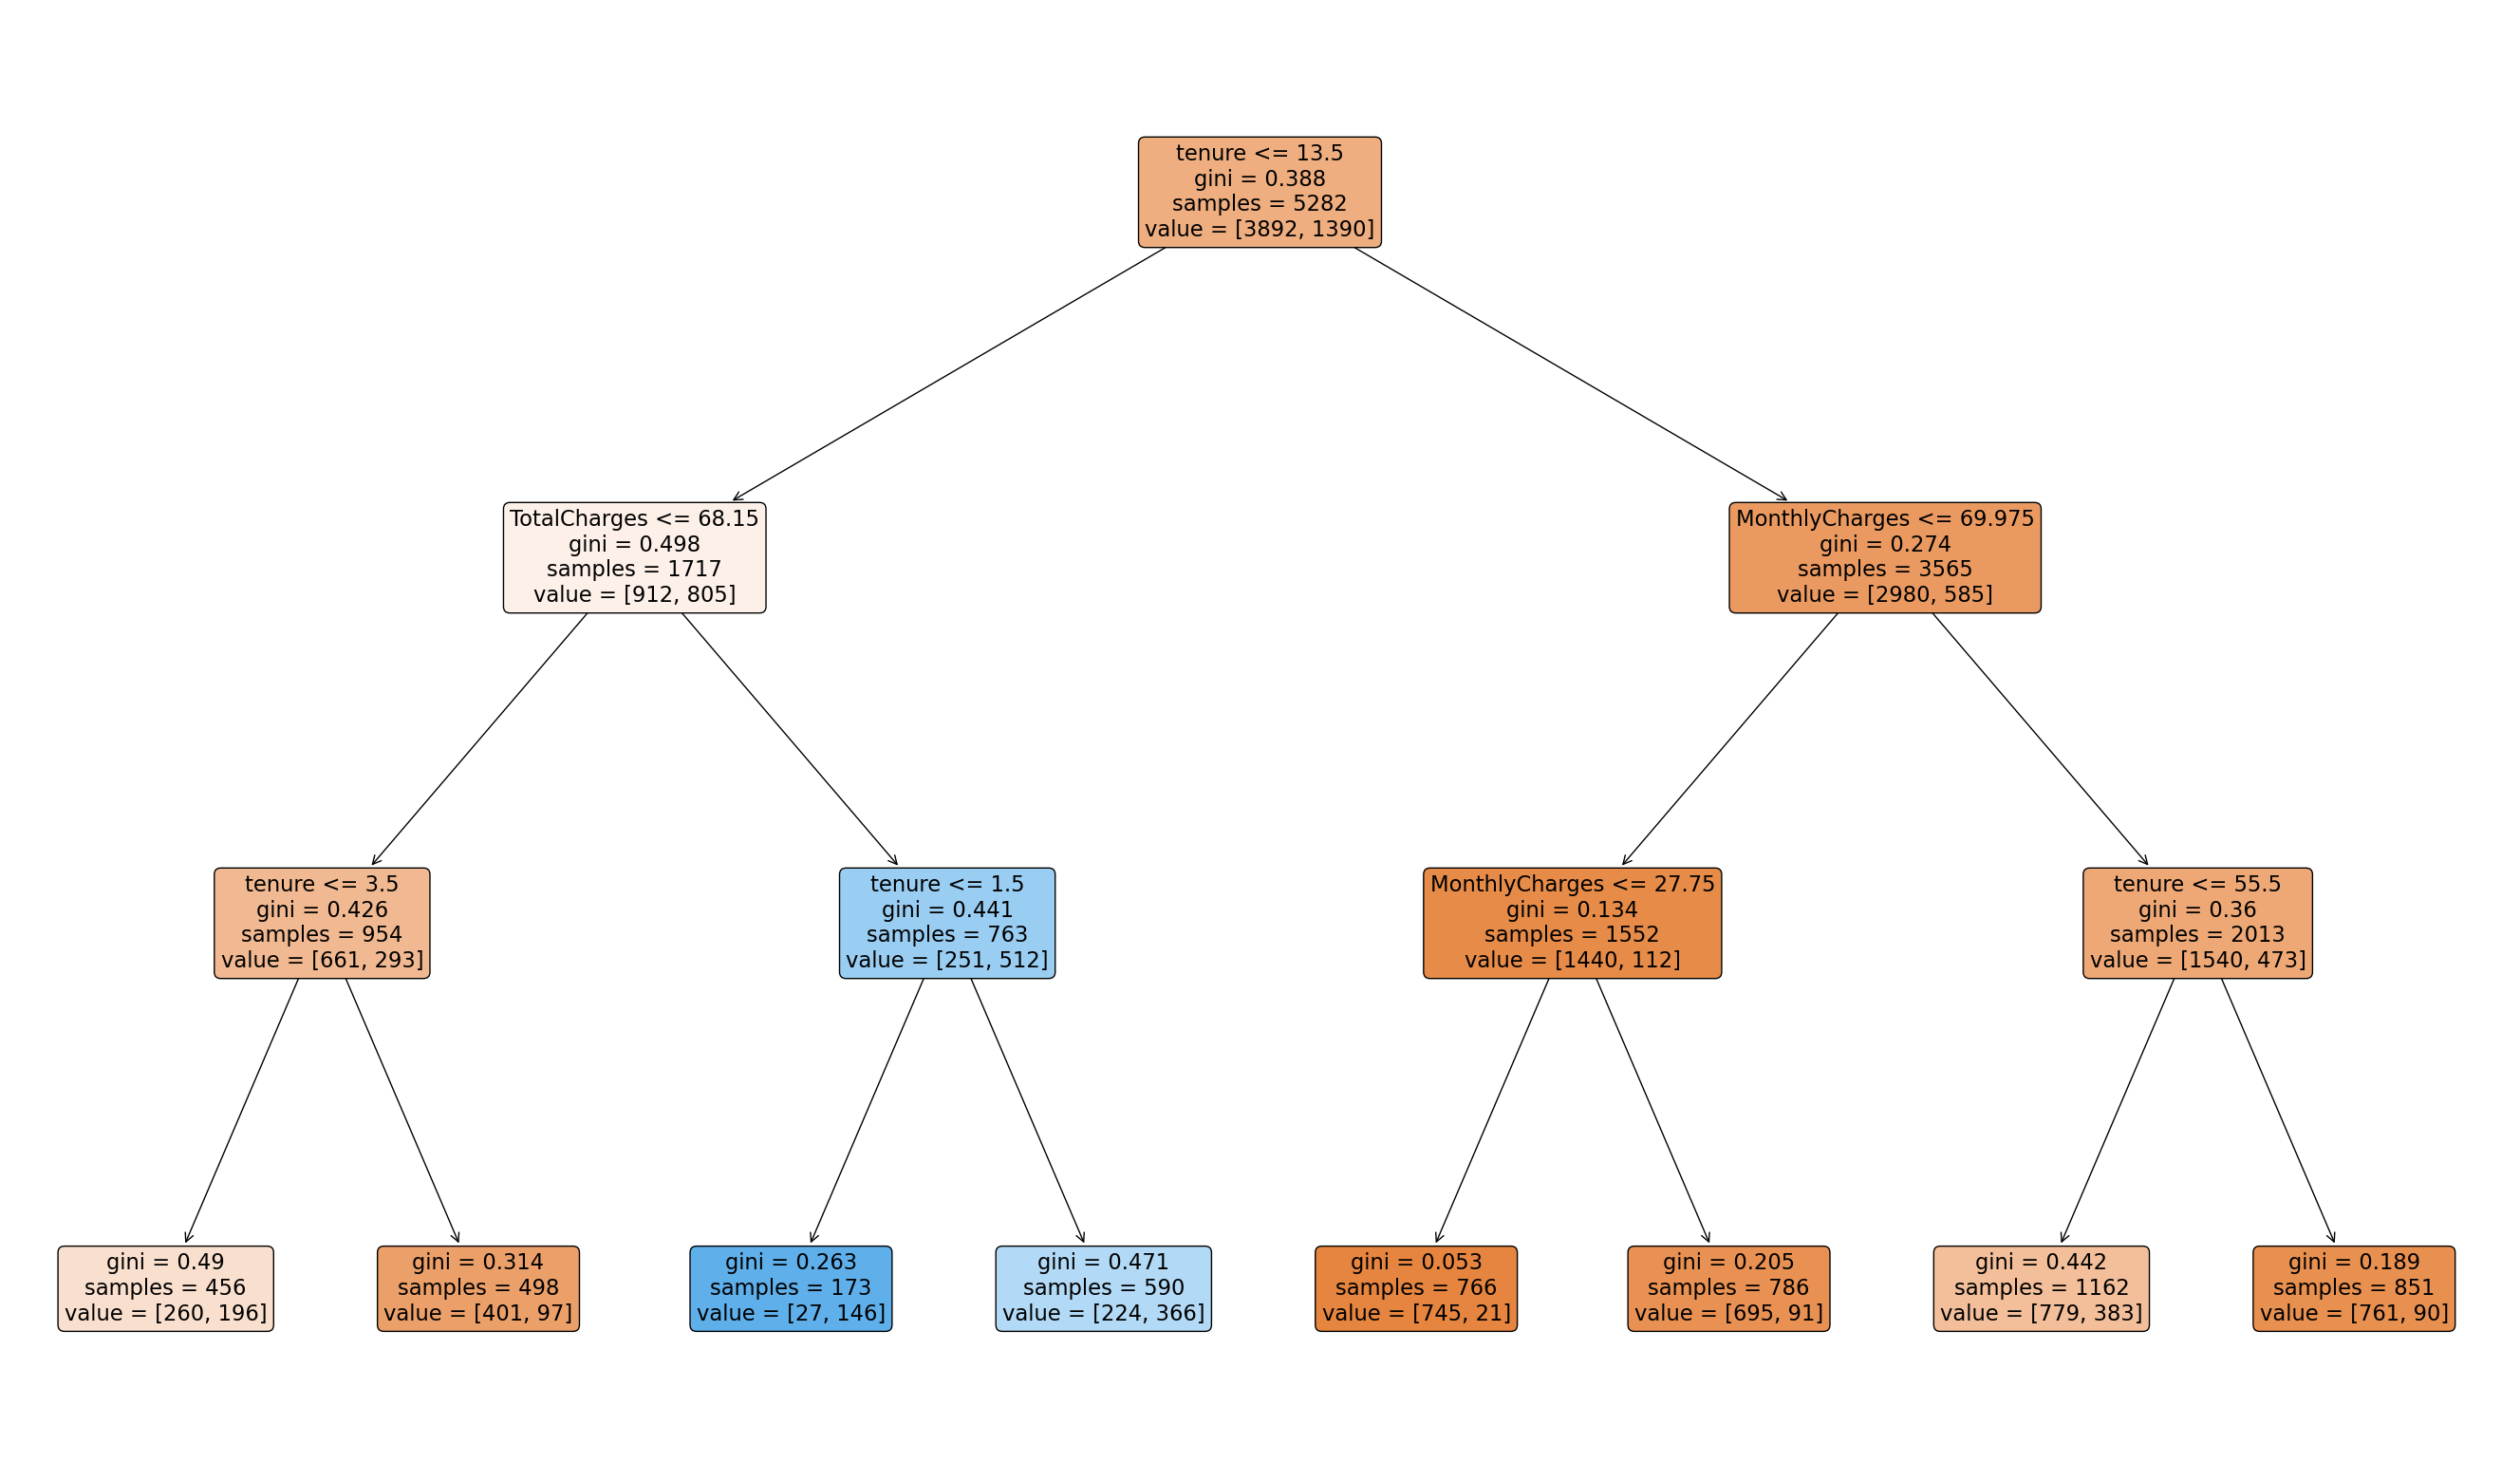

In [40]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=list(X.columns))
plt.show() 

### Create a function that takes a list of integers as input and trains and tests a Decision Tree Classifier using each integer as max_depth

In [58]:
def decisiontree(X, y, random_state):
    max_d=[]
    for i in range(0,5):
        max_d.append(int(input(f"input 5 max depth for decision tree model. FROM 1 to inf. Max depth #{i+1}:")))
    
    #train and test split
    X_train, X_test,y_train, y_test=train_test_split(X,y, random_state=42)
    #mapping to get 0/1 in y_train and y_test for model
    mapping = {'No': 0, 'Yes': 1}
    y_train=y_train["Churn"].map(mapping)
    y_test=y_test["Churn"].map(mapping)
                     
    
    for depth in max_d:
        model = DecisionTreeClassifier(max_depth=depth)
        model.fit(X_train, y_train)

        y_pred_train_dt = model.predict(X_train)
        y_pred_test_dt = model.predict(X_test)


        performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
        print(f"performance_df for max_depth={depth}")
        display(performance_df)
        
        fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

        plot_tree(model,filled = True, rounded=True,feature_names=list(X.columns))
        plt.show() 

input 5 max depth for decision tree model. FROM 1 to inf. Max depth #1:1
input 5 max depth for decision tree model. FROM 1 to inf. Max depth #2:2
input 5 max depth for decision tree model. FROM 1 to inf. Max depth #3:3
input 5 max depth for decision tree model. FROM 1 to inf. Max depth #4:4
input 5 max depth for decision tree model. FROM 1 to inf. Max depth #5:5
performance_df for max_depth=1


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.736842,0.727995
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000


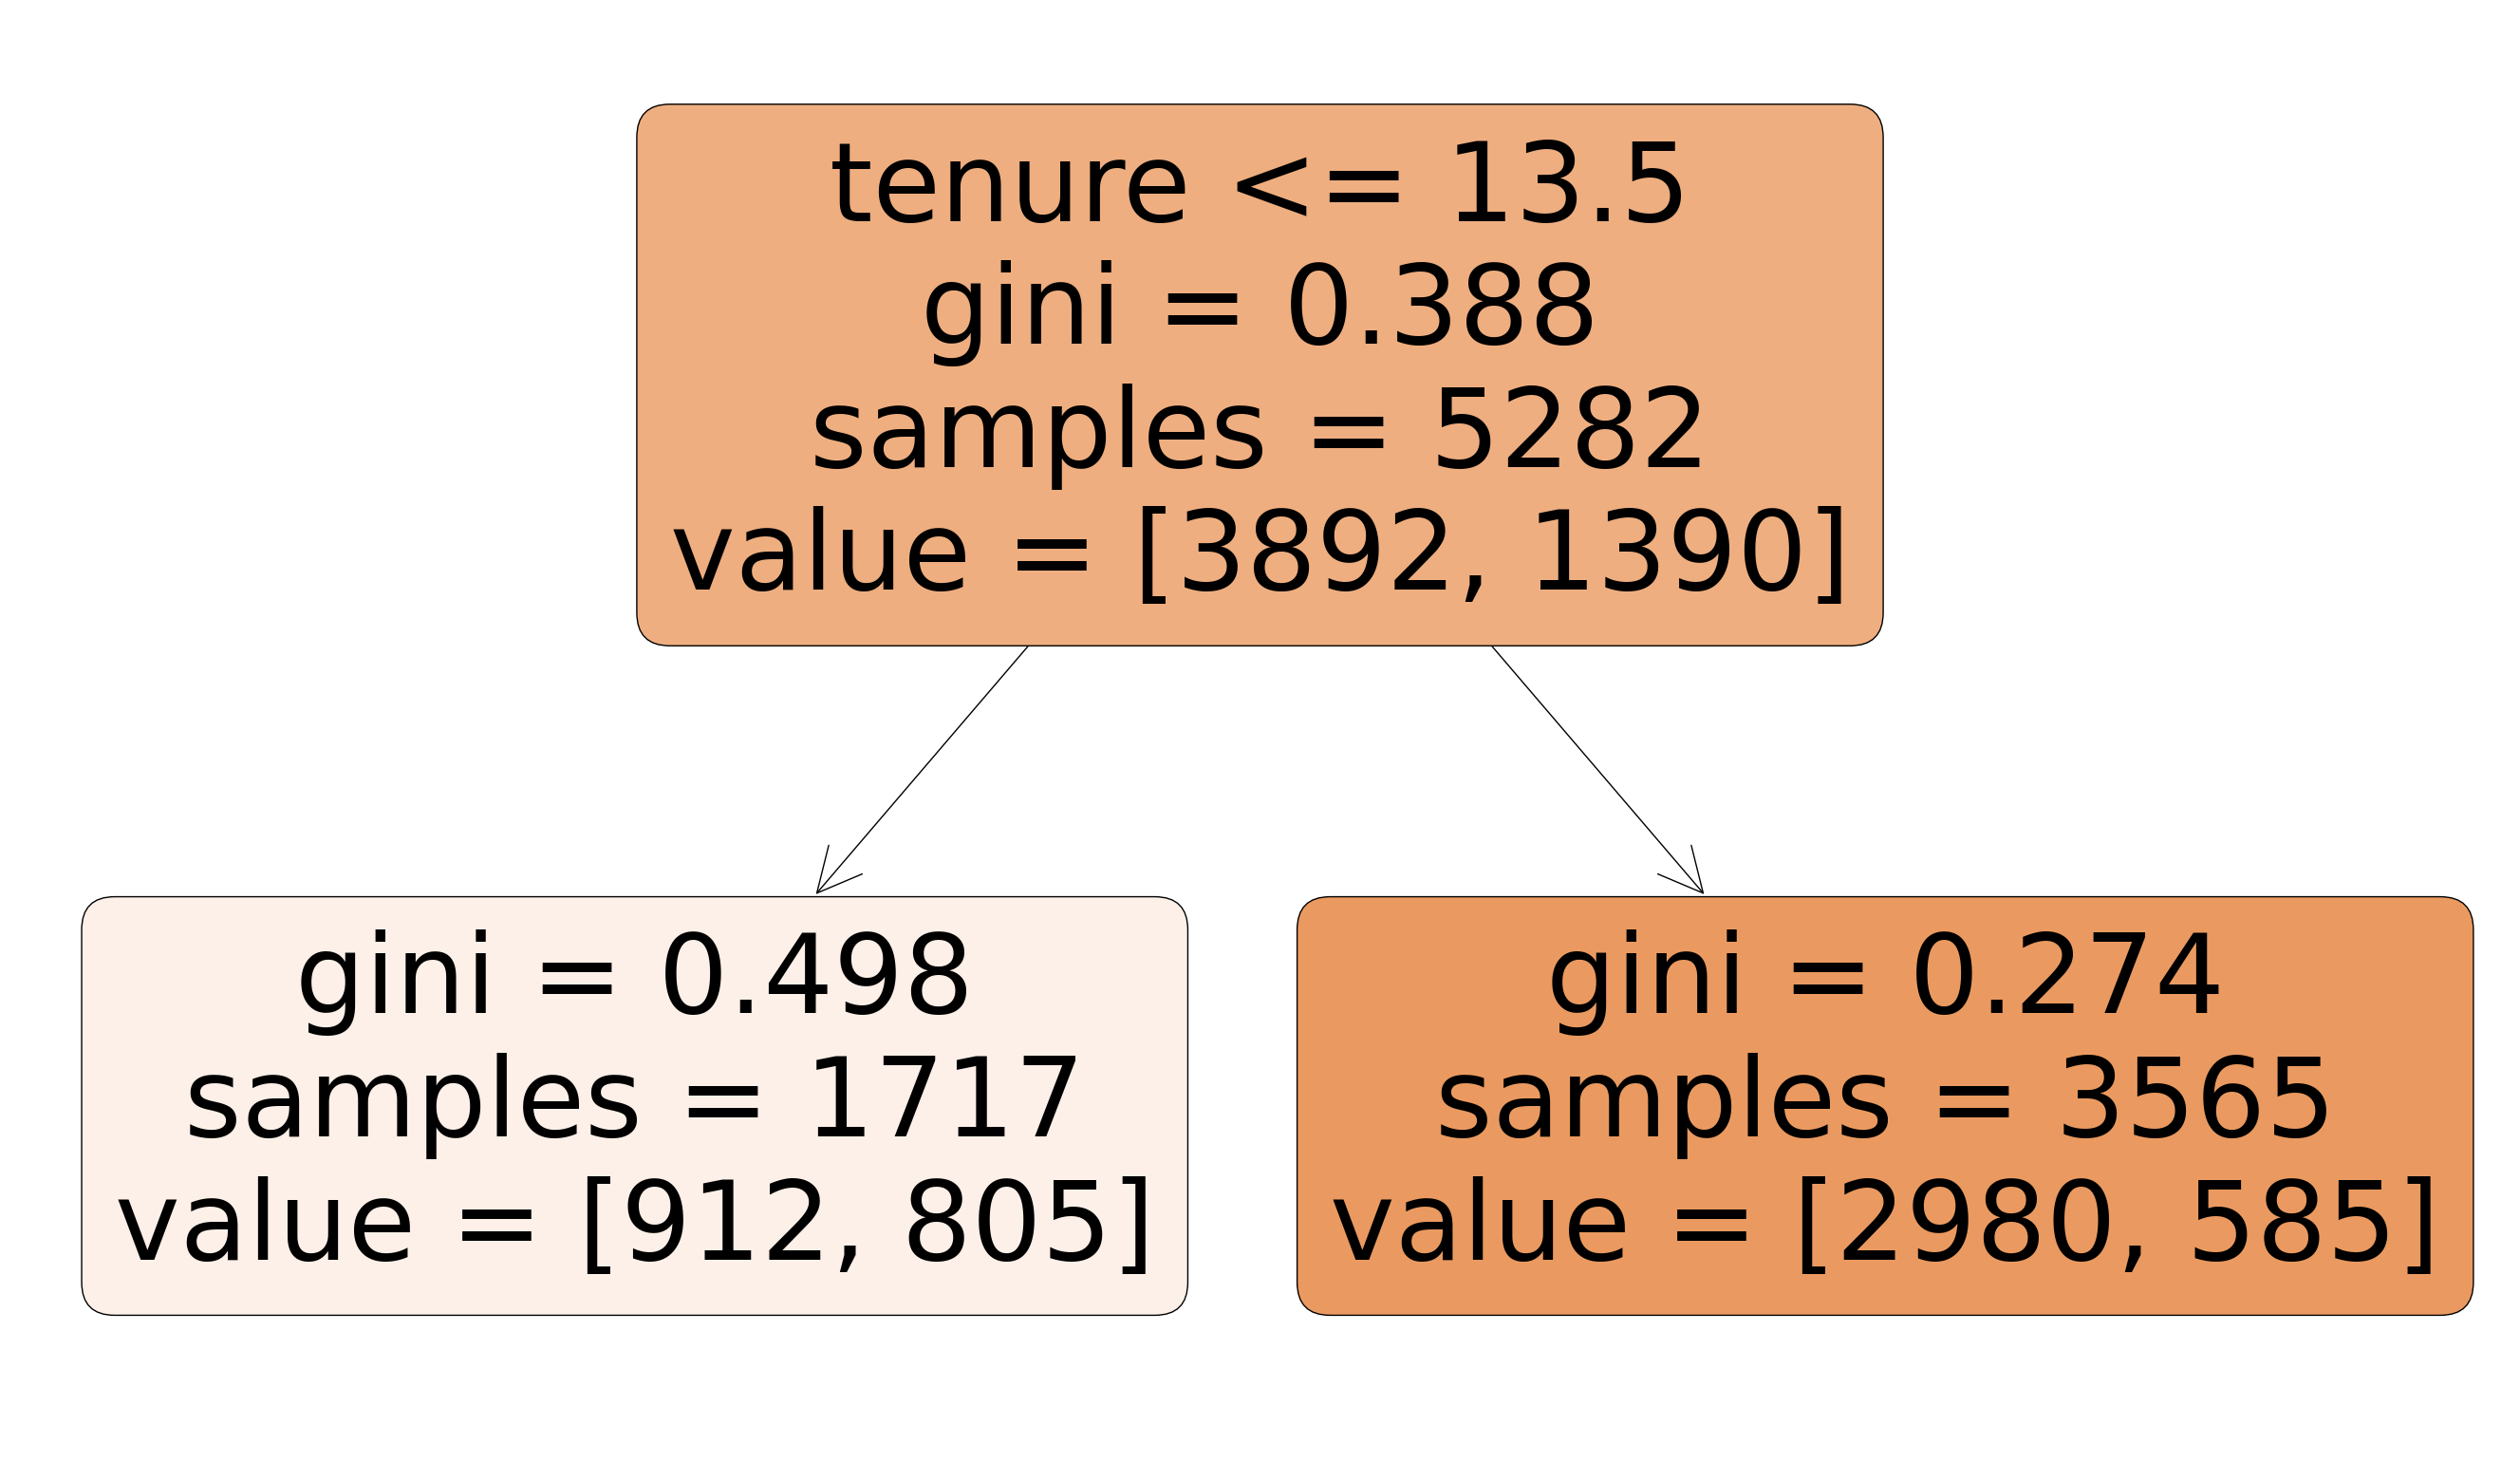

performance_df for max_depth=2


,Error_metric,Train,Test
0,Accuracy,0.786255,0.778535
1,Precision,0.671035,0.667925
2,Recall,0.368345,0.369520


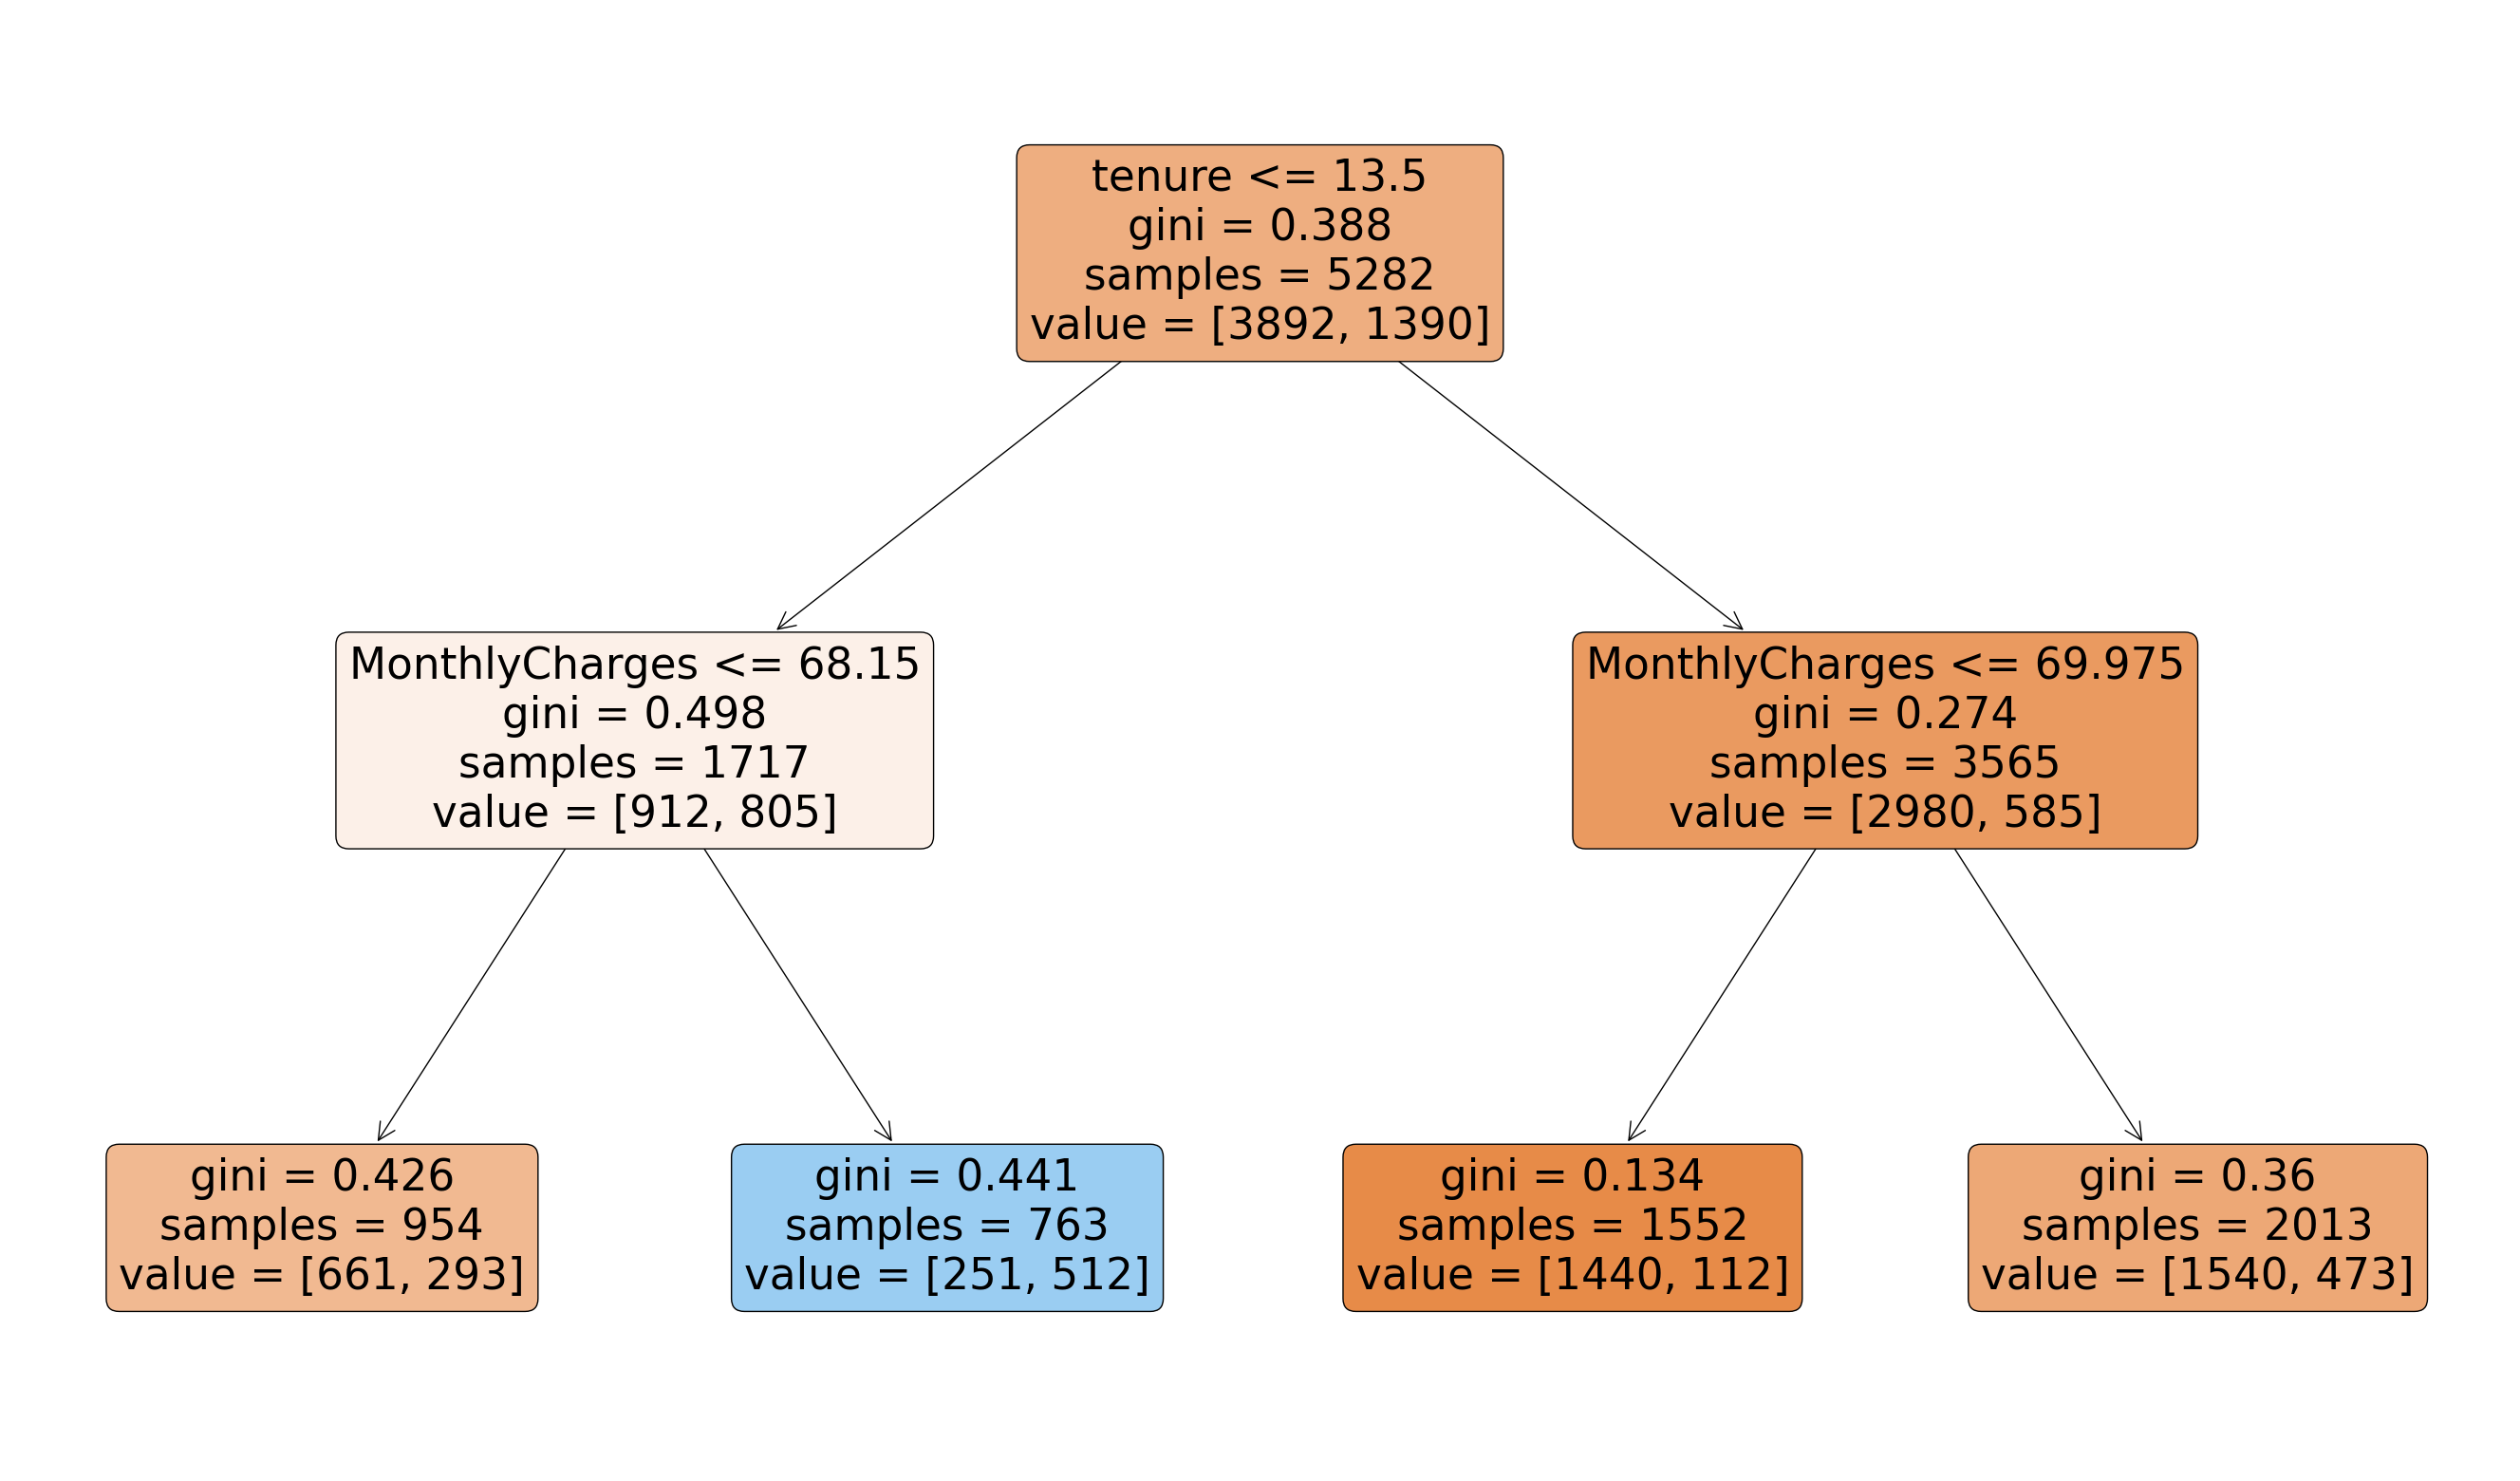

performance_df for max_depth=3


,Error_metric,Train,Test
0,Accuracy,0.786255,0.778535
1,Precision,0.671035,0.667925
2,Recall,0.368345,0.369520


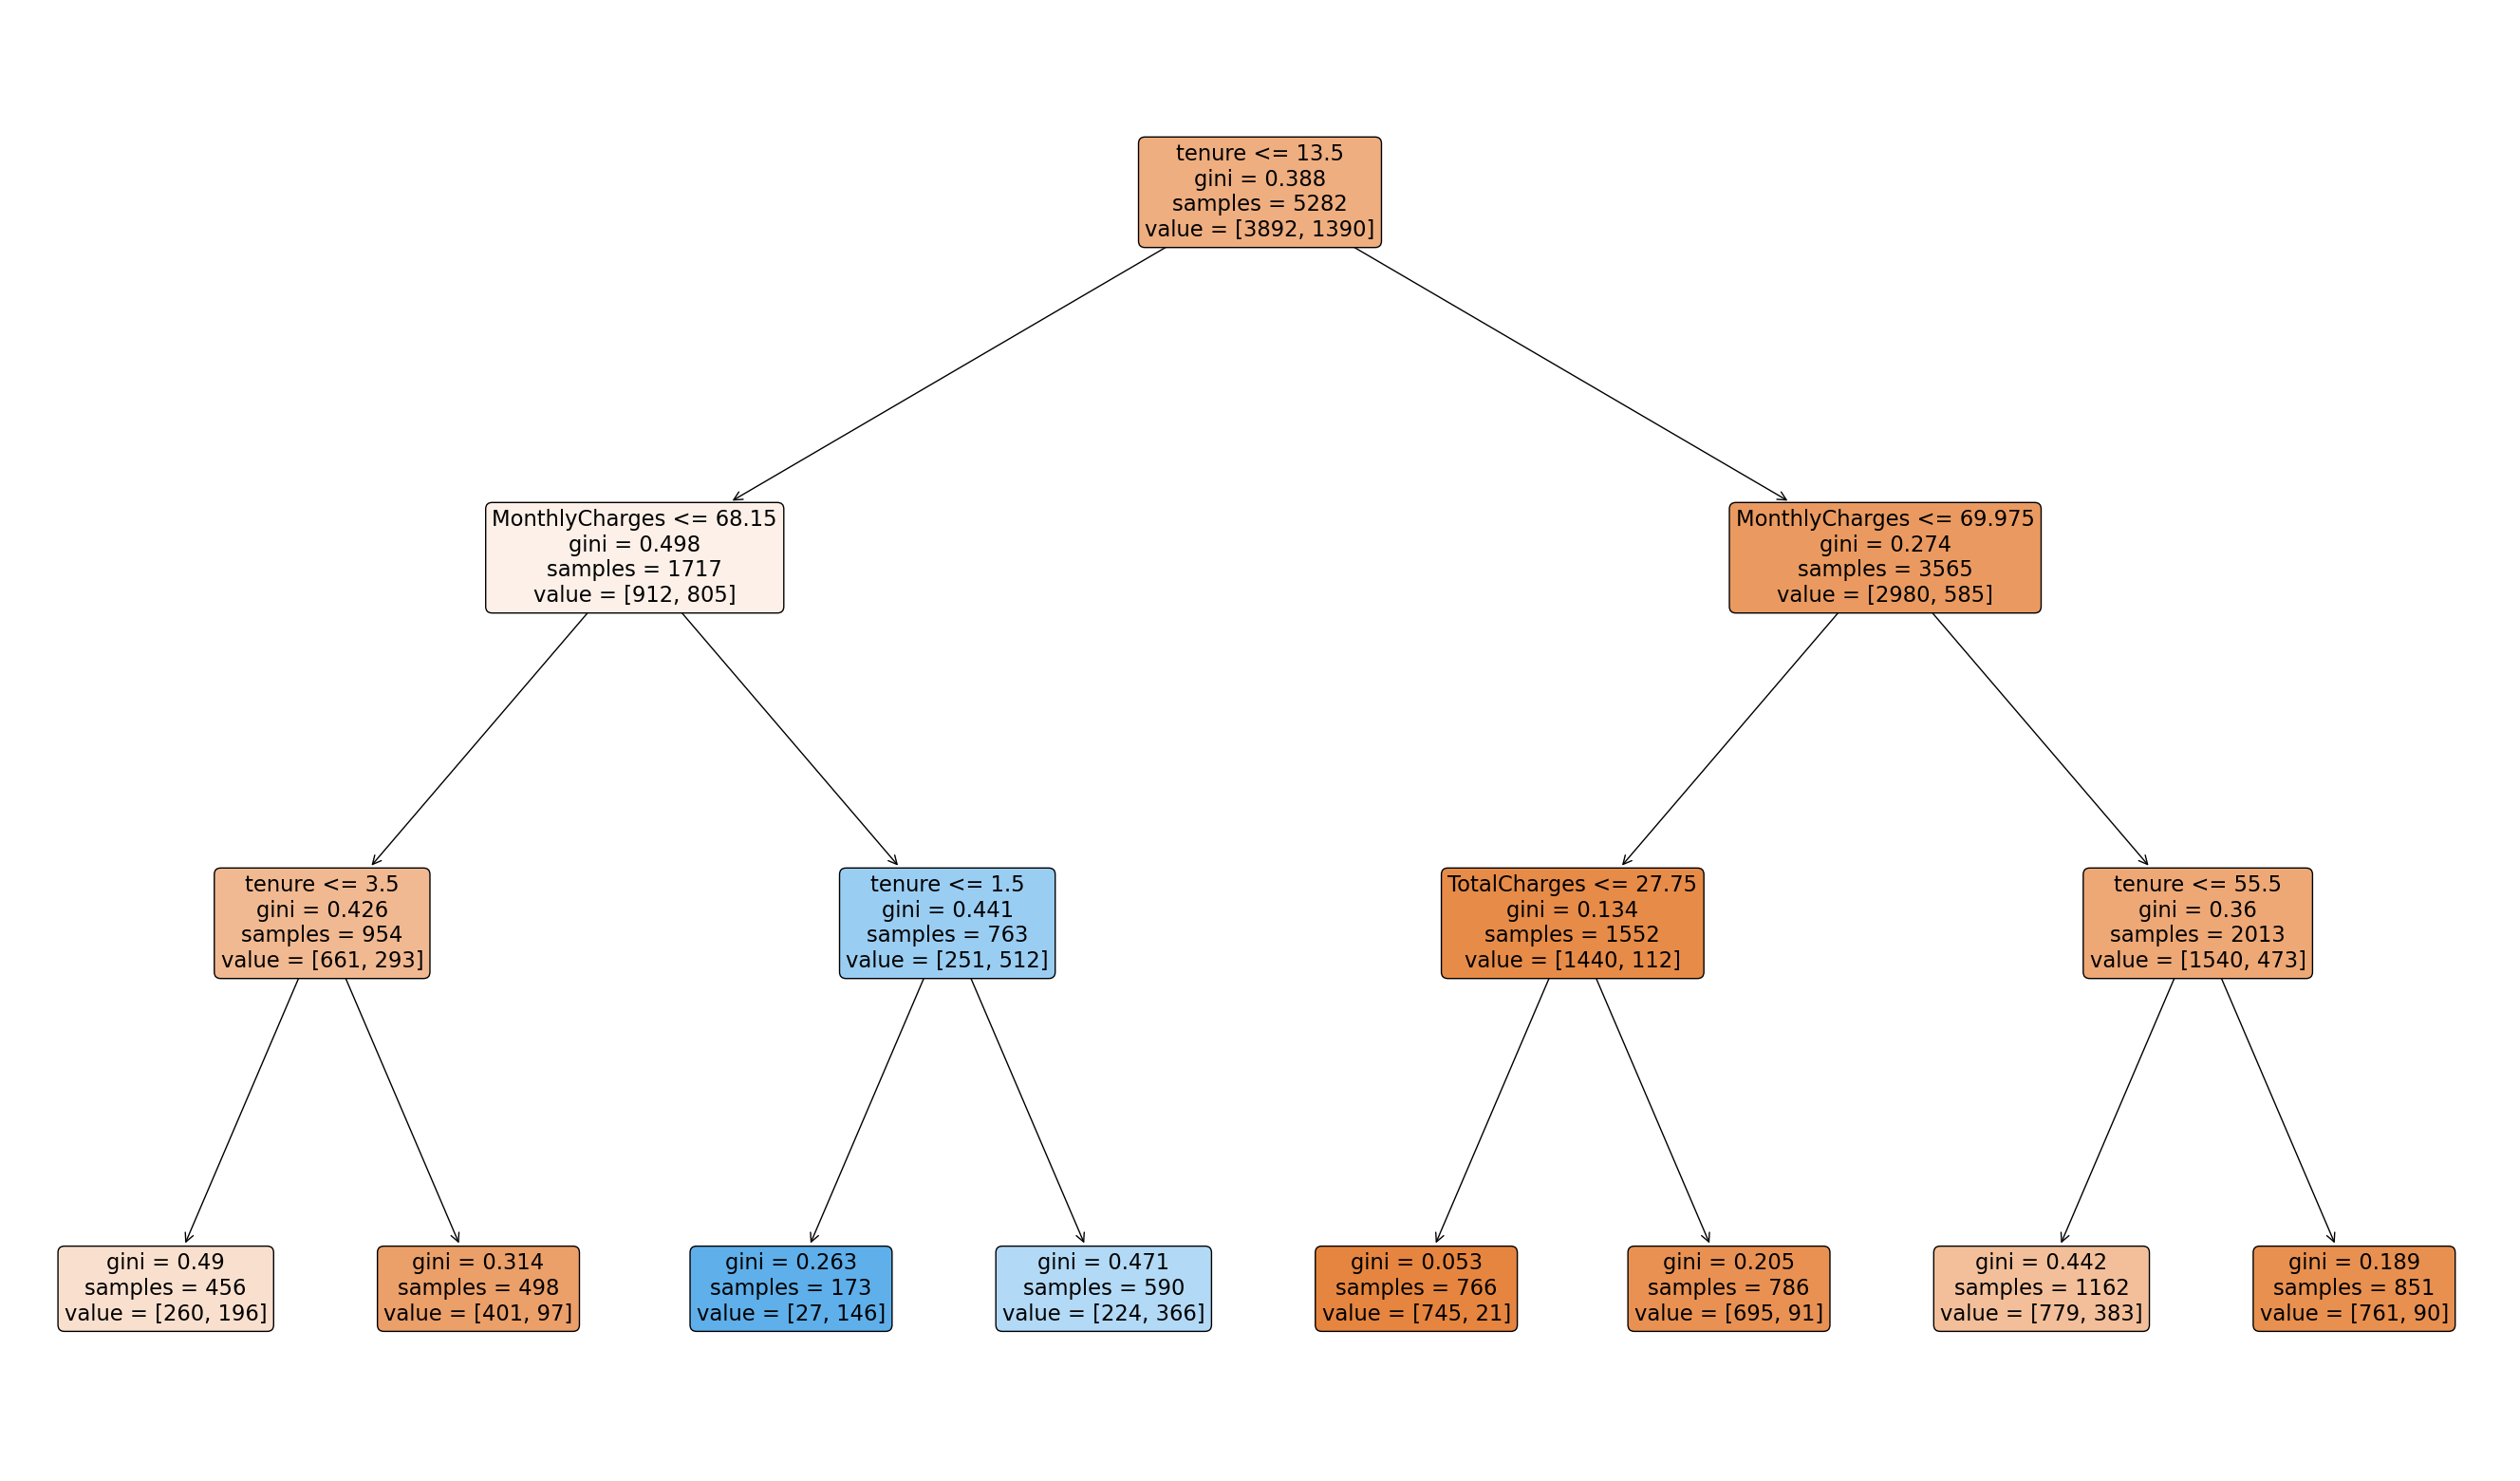

performance_df for max_depth=4


,Error_metric,Train,Test
0,Accuracy,0.789284,0.779671
1,Precision,0.632031,0.628169
2,Recall,0.476978,0.465553


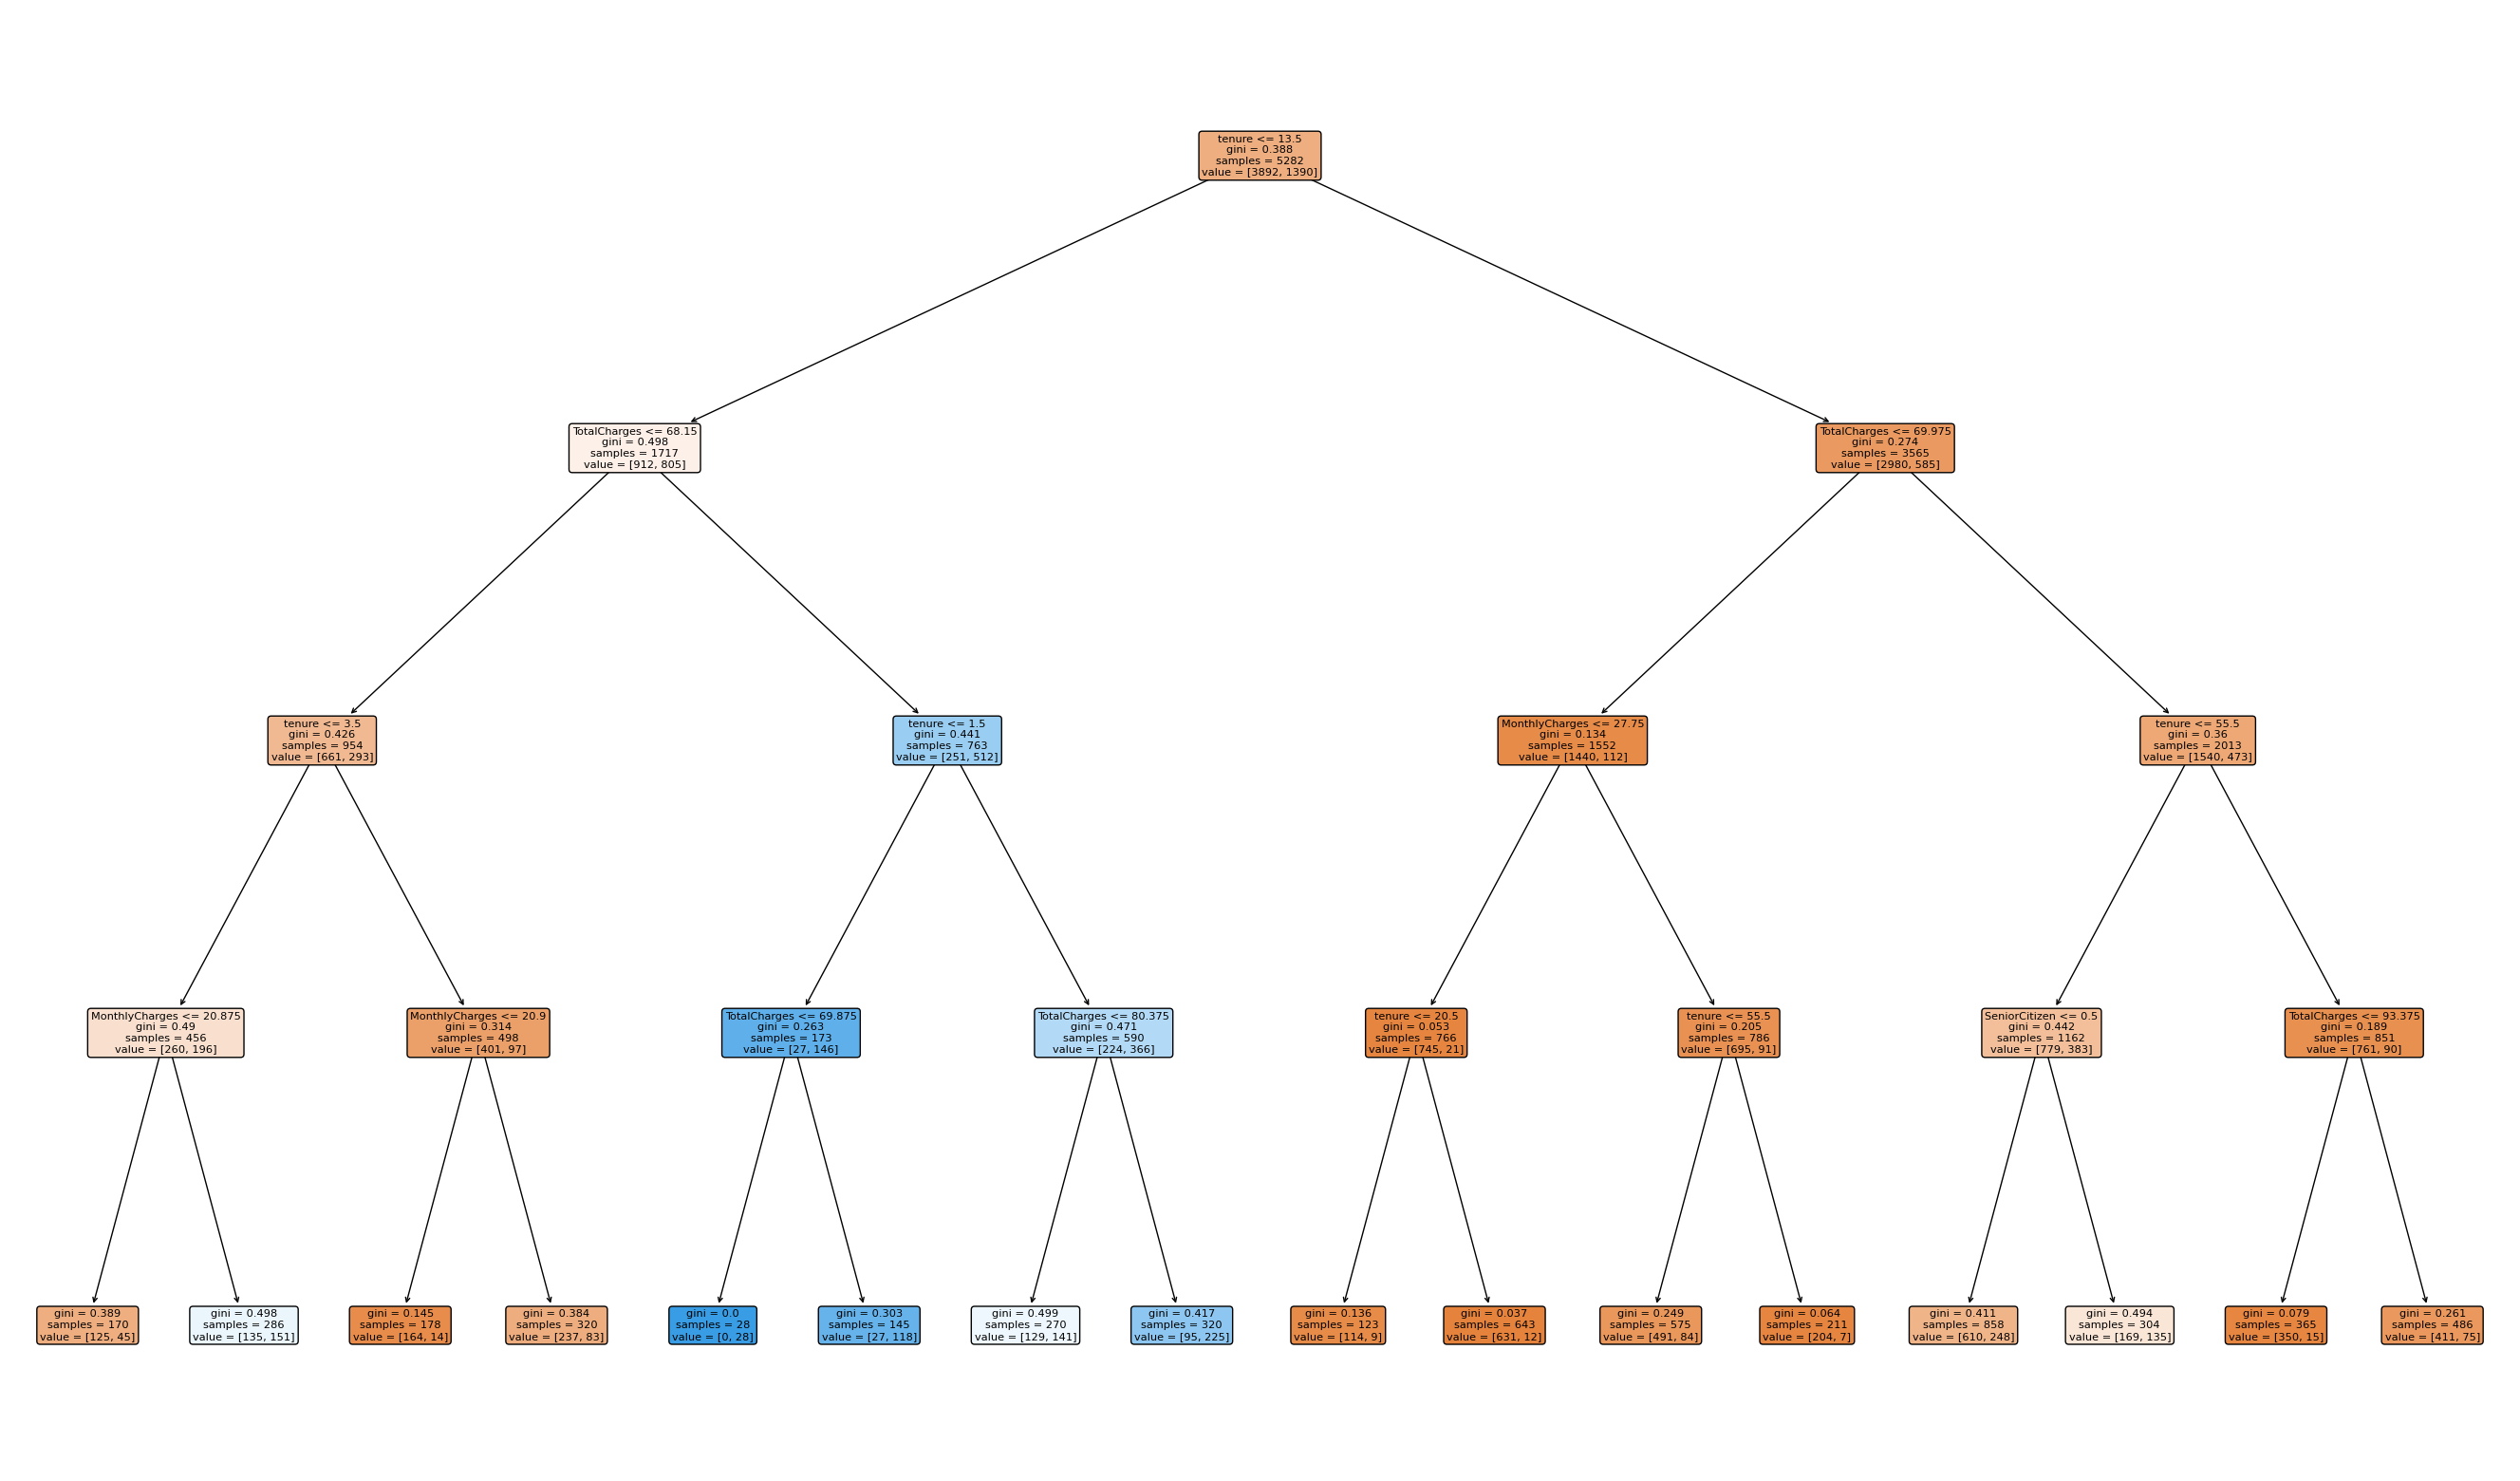

performance_df for max_depth=5


,Error_metric,Train,Test
0,Accuracy,0.795532,0.789892
1,Precision,0.719547,0.735931
2,Recall,0.365468,0.354906


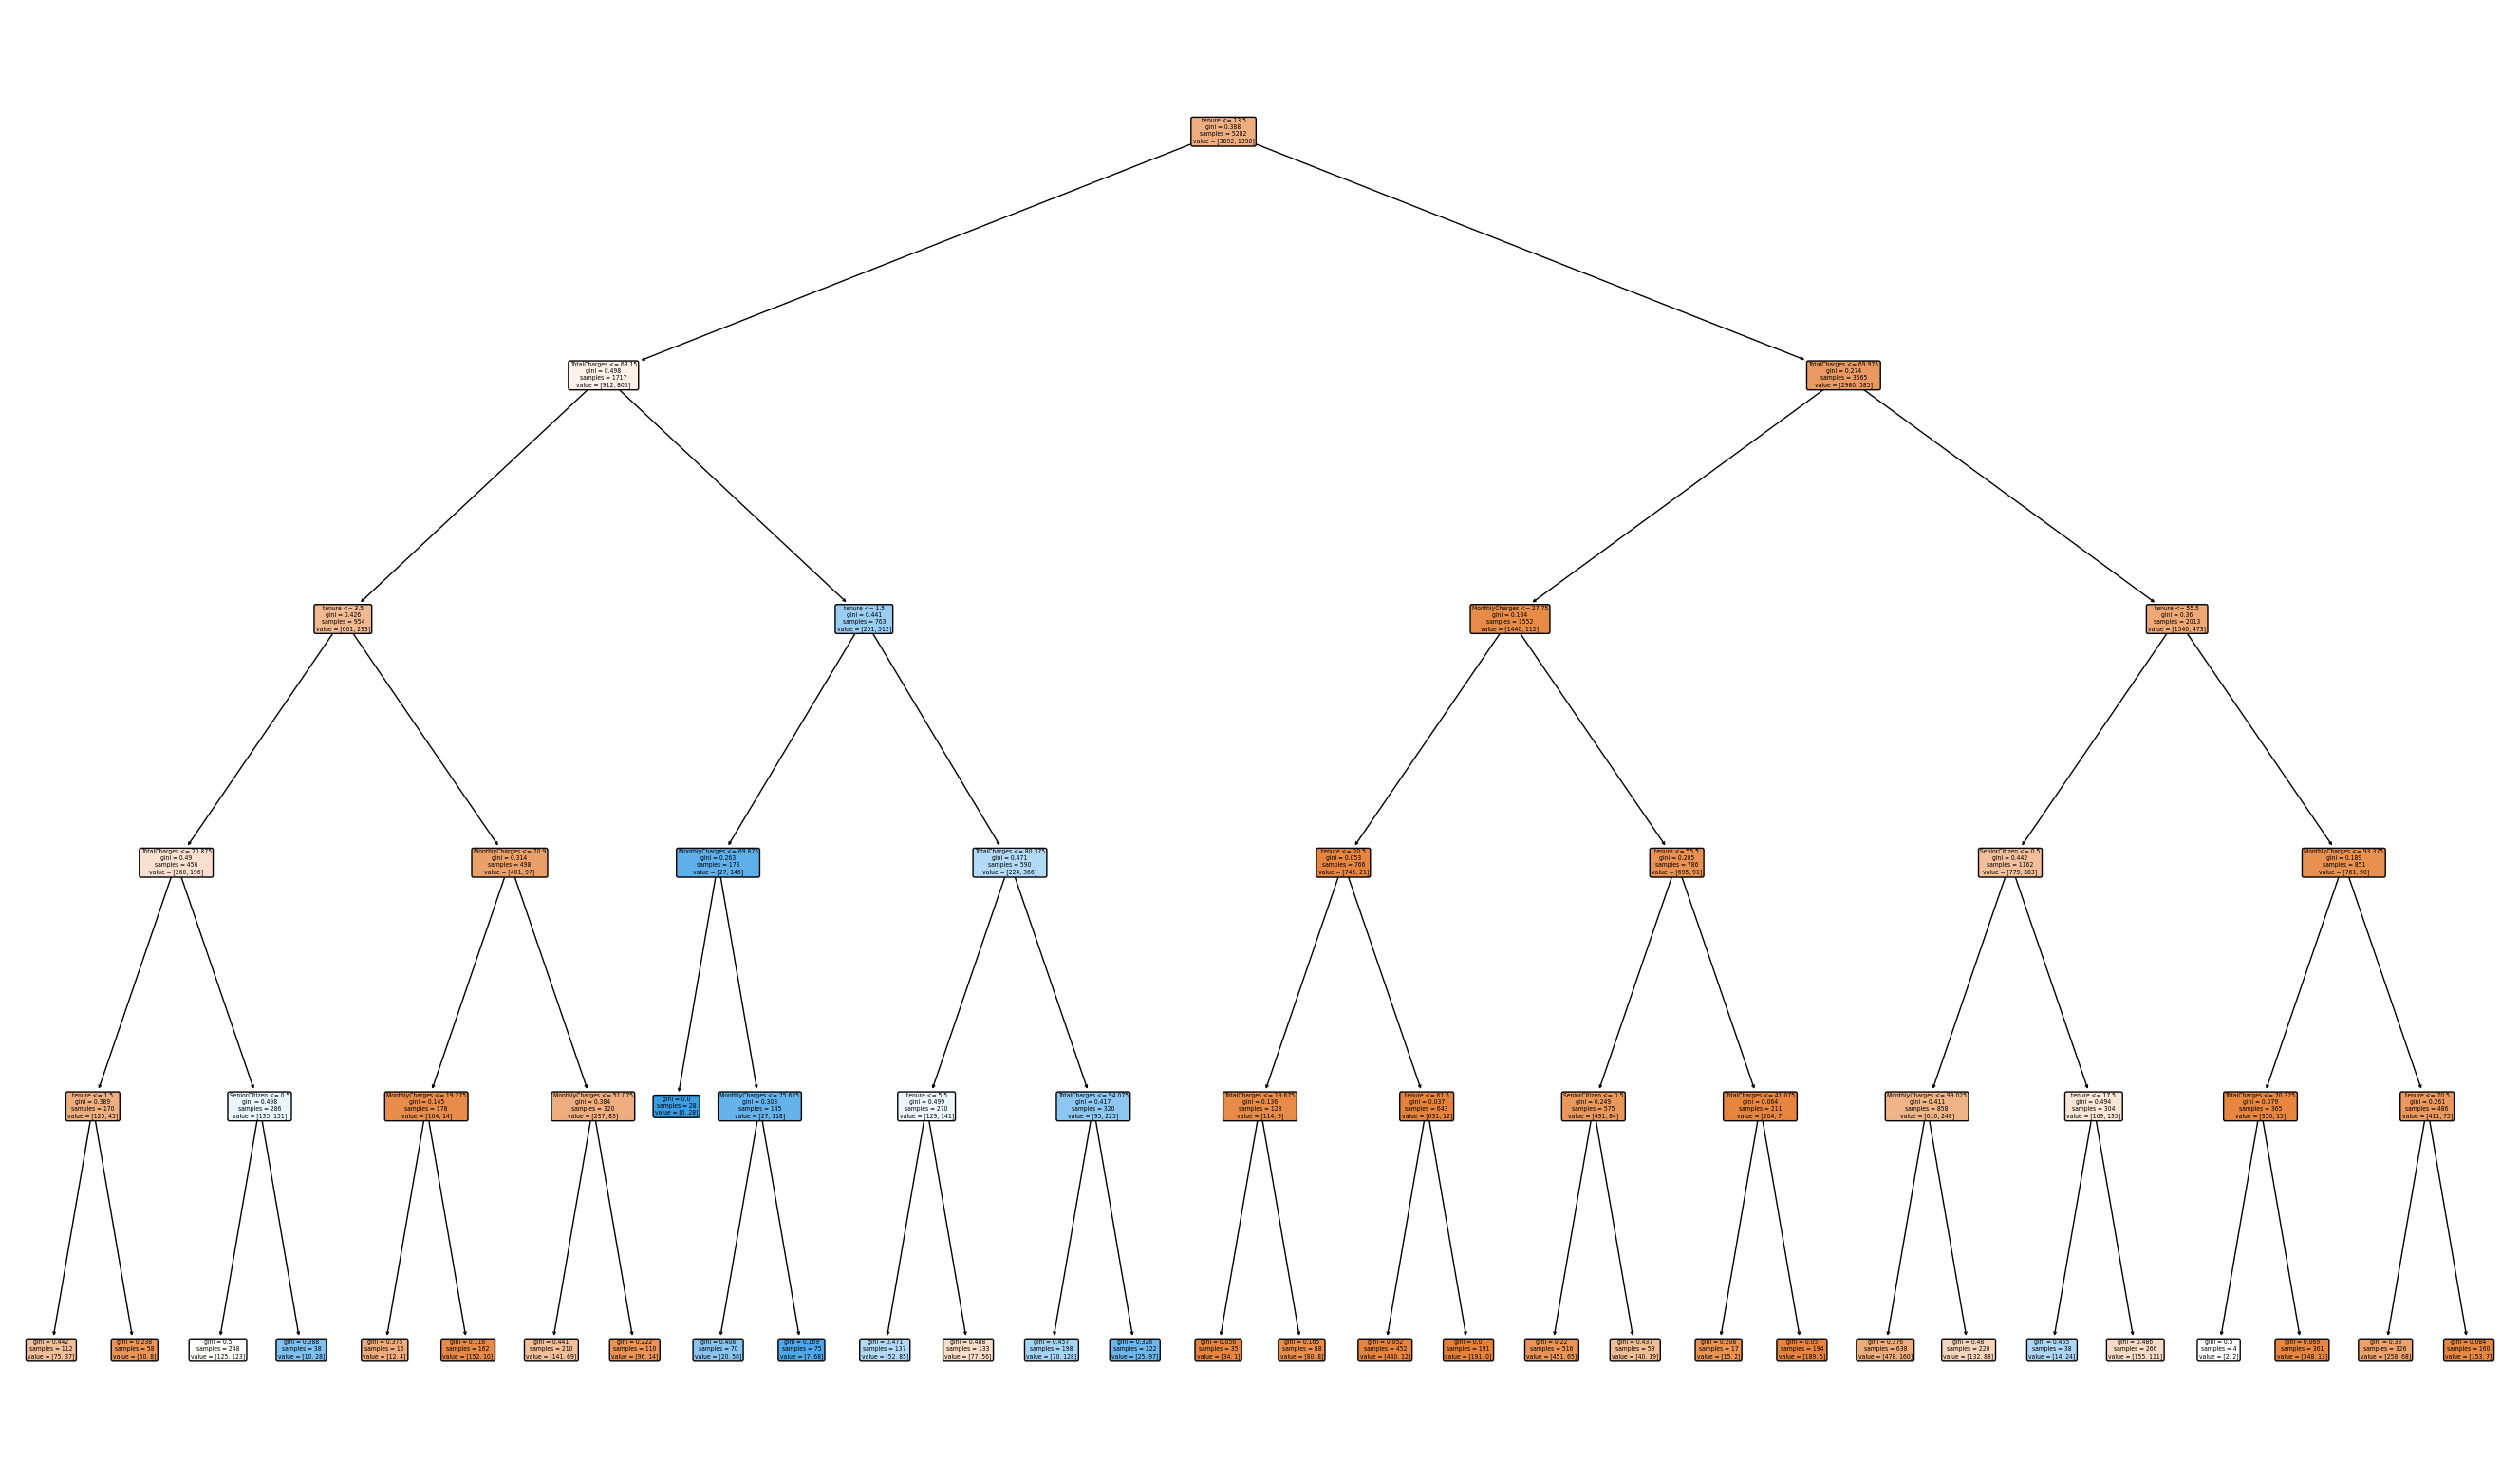

In [59]:
decisiontree(X, y, 42)